<table style="width: 100%">
    <tr style="background: #ffffff">
        <td style="padding-top:25px;width: 180px"><img src="https://mci.edu/templates/mci/images/logo.svg" alt="Logo"></td>
        <td style="width: 100%">
            <div style="text-align:right; width: 100%; text-align:right"><font style="font-size:38px"><b>Data Science</b></font></div>
            <div style="padding-top:0px; width: 100%; text-align:right"><font size="4"><b>WS 2022</b></font></div>
        </td>
    </tr>
</table>

---

# 5 Cross-Validation and Model Selection

In this session we revist the penguin data set from last week. We still know, that there are no serious outliers, but some missing values. So we start by removing observations with missing values.



In [1]:
import seaborn as sns
import pandas as pd

penguins = sns.load_dataset("penguins")
penguins = penguins.dropna()
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


## 5.1 Resampling / Cross Validation

In the first part, we will take the pratical approach an cut a random test-set from the data and perform a k-fold cross-validation on the remaining data.


## Data preparation

Frist, we create binary dummy variables for species, island and sex and remove the original variables from the data set

In [2]:
penguins_cleaned = penguins.dropna()
penguins_cleaned

penguins_cleaned["isAdelie"] = False
penguins_cleaned["isGentoo"] = False
penguins_cleaned.loc[:]["isAdelie"] = penguins_cleaned["species"]=="Adelie"
penguins_cleaned.loc[:]["isGentoo"] = penguins_cleaned["species"]=="Gentoo"
penguins_cleaned["island"].unique()

penguins_cleaned["fromTorgersen"] = False
penguins_cleaned["fromBiscoe"] = False
penguins_cleaned.loc[:]["fromTorgersen"] = penguins_cleaned["island"]=="Torgersen"
penguins_cleaned.loc[:]["fromBiscoe"] = penguins_cleaned["island"]=="Biscoe"

penguins_cleaned["isFemale"] = penguins_cleaned["sex"]=="Female"
penguins_cleaned

penguins_cleaned.drop(["species", "island","sex"], axis = 1)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,isAdelie,isGentoo,fromTorgersen,fromBiscoe,isFemale
0,39.1,18.7,181.0,3750.0,True,False,True,False,False
1,39.5,17.4,186.0,3800.0,True,False,True,False,True
2,40.3,18.0,195.0,3250.0,True,False,True,False,True
4,36.7,19.3,193.0,3450.0,True,False,True,False,True
5,39.3,20.6,190.0,3650.0,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,False,True,False,True,True
340,46.8,14.3,215.0,4850.0,False,True,False,True,True
341,50.4,15.7,222.0,5750.0,False,True,False,True,False
342,45.2,14.8,212.0,5200.0,False,True,False,True,True


### Creating a test set

The sklearn model provides us [ready-to-use functions](https://scikit-learn.org/stable/modules/cross_validation.html) for splitting the data.

First, we use the ```train_test_split()``` function to create an hold-out test set from the original data. We pass the dataframe and test set size as the main parameters. We also ensure, that the data is suffled and set a random state (seed) for preproducibility.

In [3]:
import numpy as np
from sklearn.model_selection import train_test_split

training_and_validation, test = train_test_split(penguins_cleaned, test_size=0.15, shuffle = True, random_state=1)

print("The original data has {} observations.".format(penguins_cleaned.shape[0]))
print("-- {} are in the training and validation set.".format(training_and_validation.shape[0]))
print("-- {} are in the test set.".format(test.shape[0]))

The original data has 333 observations.
-- 283 are in the training and validation set.
-- 50 are in the test set.


### Implementing k-fold

Here, we omit the shuffling, to ensure different data in each fold. In this way, it is easier to see how the data is split. Without any randomness, we also do not have to set a seed.

Be aware, that this function does not return the DataFrame itself, but the indicies of the training and validation set in the original data set (`training_and_validation`).

In [4]:
from sklearn.model_selection import KFold

# Creating the k-fold object with 5 folds
kf = KFold(n_splits=5)

# Implementing a counter
fold = 0

# looping over the splits of the k-fold object
for train_index, validation_index in kf.split(training_and_validation):

    fold = fold + 1

    print("This is fold  number {}. We stored the indicies of the training and validation set of the fold.".format(fold))
    print("The following indicies are in the validation set:")
    print(validation_index)
    print("\n")



This is fold  number 1. We stored the indicies of the training and validation set of the fold.
The following indicies are in the validation set:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56]


This is fold  number 2. We stored the indicies of the training and validation set of the fold.
The following indicies are in the validation set:
[ 57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74
  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92
  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113]


This is fold  number 3. We stored the indicies of the training and validation set of the fold.
The following indicies are in the validation set:
[114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131
 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149
 150 15

## Bringing it all together

Next, we use the sets, we created to train different models. We start with an simple example, where we only analyze one model with all possible predictors.

We start by creating a data structre, to store the results of the experiment. For each fold and earch model, we want to store the data set, we used, the error we made, the predictors and the number of predictors. We also want to store an individual number for each model.

In [5]:
# Here we just prepare the data structure to store the results
import pandas as pd

columns=["fold", "data_set", "MSE", "predictors" ,"number_of_predictors", "model_number"]

### Training with Cross-Validation

In [6]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression

# The kFold Split
kf = KFold(n_splits=5)

# An empty list to store the results
results = []

# The full list of possible predictors
list_of_predictors = ['bill_length_mm', 'bill_depth_mm','flipper_length_mm', 'isAdelie', 'isGentoo','fromTorgersen',	'fromBiscoe',	'isFemale']

# We call the first fold 0 and the first model 1
# We will increment this in the loop
fold = 0
model_number = 1

# Loop over the five fold, we created
for train_index, validation_index in kf.split(training_and_validation):

    fold = fold + 1

    # Defining the predicted variable y and predictor X
    X_train = training_and_validation.iloc[train_index][list_of_predictors]
    y_train = training_and_validation.iloc[train_index][["body_mass_g"]]


    # Define, that we want to take a linear regression as a model f
    reg = LinearRegression()

    # Fitting Simple Linear Regression to the test set
    reg.fit(X_train, y_train)

    # Make prediction on the validation set
    X_validate = training_and_validation.iloc[validation_index][list_of_predictors]
    y_validate = training_and_validation.iloc[validation_index][["body_mass_g"]]
    y_hat = reg.predict(X_validate)

    # Calculate the MSE
    mse = np.mean((y_validate-y_hat)**2)[0]

    # Add the results of the folds to the prior results
    results.append([fold, 'validation', mse, list_of_predictors, len(list_of_predictors), model_number])


### Evaluation on the Test Set

Next, we use the full training and validation set to make a prediction on the unseen test set:

In [7]:
    # Define, that we want to take a linear regression as a model f
    reg = LinearRegression()

    X_training_and_validation= training_and_validation[list_of_predictors]
    y_training_and_validation = training_and_validation["body_mass_g"]


    # Fitting Simple Linear Regression to the test set
    reg.fit(X_training_and_validation, y_training_and_validation)

    # Make prediction on the validation set
    X_test = test[list_of_predictors]
    y_test = test["body_mass_g"]
    y_hat = reg.predict(X_test)

    mse = np.mean((y_test-y_hat)**2)

    results.append([0, 'test', mse, list_of_predictors, len(list_of_predictors), model_number])

Finally, we create a data set from our lusts of results.

In [8]:
df_results = pd.DataFrame(columns=columns, data = results)
df_results

,fold,data_set,MSE,predictors,number_of_predictors,model_number
0,1,validation,105118.967335,"[bill_length_mm, bill_depth_mm, flipper_length...",8,1
1,2,validation,77949.249522,"[bill_length_mm, bill_depth_mm, flipper_length...",8,1
2,3,validation,81003.906826,"[bill_length_mm, bill_depth_mm, flipper_length...",8,1
3,4,validation,86648.824233,"[bill_length_mm, bill_depth_mm, flipper_length...",8,1
4,5,validation,64040.560553,"[bill_length_mm, bill_depth_mm, flipper_length...",8,1
5,0,test,94117.240247,"[bill_length_mm, bill_depth_mm, flipper_length...",8,1


### Visualization of the results

As to be be expected, we observe some variance in the $MSE$ on the validation sets of the cross-validation. The test-set error is close to the average error of the cross validation runs.

<AxesSubplot:xlabel='data_set', ylabel='MSE'>

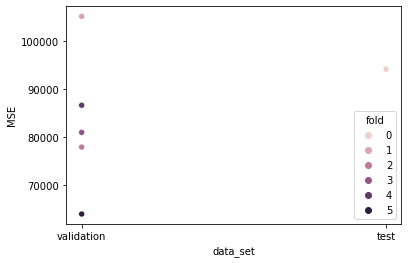

In [9]:
import seaborn as sns

sns.scatterplot(data=df_results, x="data_set", y="MSE", hue = "fold")

# 🏁 Recap

- If you have finished the tasks and have no questions, place the green card on top.
- If you have finished the tasks but would like to discuss the solutions together again, place the yellow card on top.

![](https://www.lokalinfo.ch/fileadmin/news_import/image003_03.jpg)

## 🏆 Case Study I

Perform a full best subset selection to find a good model with a 5-fold cross validation.
- What is the best model's average $MSE$?
- What are the model's predictors?
- Compare all the models You tested on the test set after training them on the full training and validation set. Does Your choosen model outperform all others?

*Hint*:

Set the ```random_state=1``` in the ```train_test_split()```
You can expand on the code above. You will have to create a second loop within the exisiting loop. This loop must run through a list of all possible predictor combinations, which are create in the cell below. All models with the same predictors should have the same model number.


In [10]:
# Hint: Itertools allows you to calculate a possible subsets
import itertools

list_of_all_predictors = ['bill_length_mm', 'bill_depth_mm','flipper_length_mm', 'isAdelie', 'isGentoo','fromTorgersen',	'fromBiscoe',	'isFemale']

model_number = 0

for L in range(0, len(list_of_all_predictors)+1):
    for subset in itertools.combinations(list_of_all_predictors, L):
        list_of_current_predictors = list(subset)
        print(list_of_current_predictors)
        model_number = model_number + 1

[]
['bill_length_mm']
['bill_depth_mm']
['flipper_length_mm']
['isAdelie']
['isGentoo']
['fromTorgersen']
['fromBiscoe']
['isFemale']
['bill_length_mm', 'bill_depth_mm']
['bill_length_mm', 'flipper_length_mm']
['bill_length_mm', 'isAdelie']
['bill_length_mm', 'isGentoo']
['bill_length_mm', 'fromTorgersen']
['bill_length_mm', 'fromBiscoe']
['bill_length_mm', 'isFemale']
['bill_depth_mm', 'flipper_length_mm']
['bill_depth_mm', 'isAdelie']
['bill_depth_mm', 'isGentoo']
['bill_depth_mm', 'fromTorgersen']
['bill_depth_mm', 'fromBiscoe']
['bill_depth_mm', 'isFemale']
['flipper_length_mm', 'isAdelie']
['flipper_length_mm', 'isGentoo']
['flipper_length_mm', 'fromTorgersen']
['flipper_length_mm', 'fromBiscoe']
['flipper_length_mm', 'isFemale']
['isAdelie', 'isGentoo']
['isAdelie', 'fromTorgersen']
['isAdelie', 'fromBiscoe']
['isAdelie', 'isFemale']
['isGentoo', 'fromTorgersen']
['isGentoo', 'fromBiscoe']
['isGentoo', 'isFemale']
['fromTorgersen', 'fromBiscoe']
['fromTorgersen', 'isFemale']
['fr

### Perform Cross Validation

Here You can adjust the code from above:

In [11]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression

training_and_validation, test = train_test_split(penguins_cleaned, test_size=0.15, shuffle = True, random_state=1)

kf = KFold(n_splits=5)

results = []

list_of_predictors = ['bill_length_mm', 'bill_depth_mm','flipper_length_mm', 'isAdelie', 'isGentoo','fromTorgersen',	'fromBiscoe',	'isFemale']



def train_and_crossvalidate(list_of_predictors, training_and_validation, model_number):
  
  fold = 0


  for train_index, validation_index in kf.split(training_and_validation):

      fold = fold + 1

      # Defining the predicted variable y and predictor X


      X_train = training_and_validation.iloc[train_index][list_of_predictors]
      y_train = training_and_validation.iloc[train_index][["body_mass_g"]]


      # Define, that we want to take a linear regression as a model f
      reg = LinearRegression()

      # Fitting Simple Linear Regression to the test set
      reg.fit(X_train, y_train)

      # Make prediction on the validation set
      X_validate = training_and_validation.iloc[validation_index][list_of_predictors]
      y_validate = training_and_validation.iloc[validation_index][["body_mass_g"]]
      y_hat = reg.predict(X_validate)

      mse = np.mean((y_validate-y_hat)**2)[0]

      results.append([fold, 'validation', mse, list_of_predictors, len(list_of_predictors), model_number])

model_number = 1
for L in range(0, len(list_of_all_predictors)+1):
    for subset in itertools.combinations(list_of_all_predictors, L):
        list_of_current_predictors = list(subset)
        model_number = model_number + 1
        
        if len(list_of_current_predictors) != 0:
          train_and_crossvalidate(list_of_current_predictors, training_and_validation, model_number)
      

In [12]:
df_results = pd.DataFrame(columns=columns, data = results)
df_results

,fold,data_set,MSE,predictors,number_of_predictors,model_number
0,1,validation,528425.308194,[bill_length_mm],1,3
1,2,validation,422437.574449,[bill_length_mm],1,3
2,3,validation,426538.156170,[bill_length_mm],1,3
3,4,validation,358419.906671,[bill_length_mm],1,3
4,5,validation,323478.395749,[bill_length_mm],1,3
...,...,...,...,...,...,...
1270,1,validation,105118.967335,"[bill_length_mm, bill_depth_mm, flipper_length...",8,257
1271,2,validation,77949.249522,"[bill_length_mm, bill_depth_mm, flipper_length...",8,257
1272,3,validation,81003.906826,"[bill_length_mm, bill_depth_mm, flipper_length...",8,257
1273,4,validation,86648.824233,"[bill_length_mm, bill_depth_mm, flipper_length...",8,257


<AxesSubplot:xlabel='number_of_predictors', ylabel='MSE'>

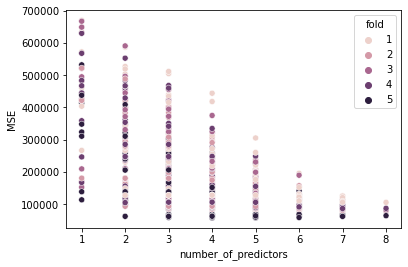

In [13]:
# With this plot You can see how the number of predictors influences the models in-sample accuracy
import seaborn as sns

sns.scatterplot(data=df_results, x="number_of_predictors", y="MSE", hue = "fold")

<AxesSubplot:xlabel='number_of_predictors', ylabel='MSE'>

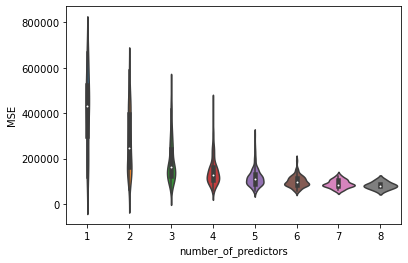

In [14]:
# This is just another way to visualize it
import seaborn as sns

sns.violinplot(data=df_results, x="number_of_predictors", y="MSE")

In [15]:
mean_vadlidation_MSE = df_results.groupby("model_number").mean()["MSE"]

In [16]:
# Model number 233 has the lowest MSE in the validation set
mean_vadlidation_MSE.idxmin()

223

In [17]:
# The model uses the following predictors:
df_results[df_results["model_number"]==223]["predictors"][1100]

['bill_length_mm',
 'bill_depth_mm',
 'flipper_length_mm',
 'isAdelie',
 'isGentoo',
 'isFemale']

# 🏁 Recap

- If you have finished the tasks and have no questions, place the green card on top.
- If you have finished the tasks but would like to discuss the solutions together again, place the yellow card on top.

![](https://www.lokalinfo.ch/fileadmin/news_import/image003_03.jpg)

### Check on Test Set

Finally, we can see, whether out selection makes sense on the test set:

In [18]:

results = []
model_number = 1
for L in range(0, len(list_of_all_predictors)+1):
    for subset in itertools.combinations(list_of_all_predictors, L):
        list_of_current_predictors = list(subset)
        model_number = model_number + 1
        
        if len(list_of_current_predictors) != 0:

          # Defining the predicted variable y and predictor X

          X_training_and_validation = training_and_validation[list_of_current_predictors]
          y_training_and_validation = training_and_validation["body_mass_g"]

          # Define, that we want to take a linear regression as a model f
          reg = LinearRegression()

          # Fitting Simple Linear Regression to the test set
          reg.fit(X_training_and_validation, y_training_and_validation)


          X_test = test[list_of_current_predictors]
          y_test = test["body_mass_g"]
          y_hat = reg.predict(X_test)

          mse = np.mean((y_test-y_hat)**2)

          results.append([0, 'test', mse, list_of_current_predictors, len(list_of_current_predictors), model_number])

In [19]:
df_results = pd.DataFrame(columns=columns, data = results)
df_results

,fold,data_set,MSE,predictors,number_of_predictors,model_number
0,0,test,499298.452851,[bill_length_mm],1,3
1,0,test,480027.025768,[bill_depth_mm],1,4
2,0,test,159455.784150,[flipper_length_mm],1,5
3,0,test,516552.666944,[isAdelie],1,6
4,0,test,232108.521476,[isGentoo],1,7
...,...,...,...,...,...,...
250,0,test,98632.299986,"[bill_length_mm, bill_depth_mm, flipper_length...",7,253
251,0,test,98590.642641,"[bill_length_mm, bill_depth_mm, isAdelie, isGe...",7,254
252,0,test,98888.804851,"[bill_length_mm, flipper_length_mm, isAdelie, ...",7,255
253,0,test,97091.357444,"[bill_depth_mm, flipper_length_mm, isAdelie, i...",7,256


In [20]:
df_results.sort_values("MSE").head(20)

,fold,data_set,MSE,predictors,number_of_predictors,model_number
254,0,test,94117.240247,"[bill_length_mm, bill_depth_mm, flipper_length...",8,257
247,0,test,94161.146609,"[bill_length_mm, bill_depth_mm, flipper_length...",7,250
248,0,test,94333.503424,"[bill_length_mm, bill_depth_mm, flipper_length...",7,251
220,0,test,94549.835072,"[bill_length_mm, bill_depth_mm, flipper_length...",6,223
241,0,test,97073.247327,"[bill_depth_mm, flipper_length_mm, isAdelie, i...",6,244
253,0,test,97091.357444,"[bill_depth_mm, flipper_length_mm, isAdelie, i...",7,256
240,0,test,97228.567677,"[bill_depth_mm, flipper_length_mm, isAdelie, i...",6,243
199,0,test,97419.655316,"[bill_depth_mm, flipper_length_mm, isAdelie, i...",5,202
218,0,test,97642.541172,"[bill_length_mm, bill_depth_mm, flipper_length...",6,221
226,0,test,97705.074785,"[bill_length_mm, bill_depth_mm, flipper_length...",6,229


In [21]:
# We can see, that model 223 is also the forth best model in the test set
# It also also the best model using only 6 variables

We can take a closer look at this model, to see how it works. If we look at the parameters, we see that for instance beeing a female penguine decreases the predicted weight.

In [22]:
# Get coefficents

best_predictors = ['bill_length_mm',
 'bill_depth_mm',
 'flipper_length_mm',
 'isAdelie',
 'isGentoo',
 'isFemale']

# Defining the predicted variable y and predictor X

X_training_and_validation = training_and_validation[best_predictors]
y_training_and_validation = training_and_validation["body_mass_g"]

# Define, that we want to take a linear regression as a model f
reg = LinearRegression()

# Fitting Simple Linear Regression to the test set
reg.fit(X_training_and_validation, y_training_and_validation)

# Print the Intercept:
print('intercept (beta_0):', reg.intercept_)

# Print the Slope:
print('slope (beta_i):', reg.coef_) 


intercept (beta_0): -1228.8475502926458
slope (beta_i): [  16.39166536   62.71409703   16.43978836  228.08685154 1224.05955709
 -407.50446643]


# 🏁 Recap

- If you have finished the tasks and have no questions, place the green card on top.
- If you have finished the tasks but would like to discuss the solutions together again, place the yellow card on top.

![](https://www.lokalinfo.ch/fileadmin/news_import/image003_03.jpg)

## 5.2 Regularisation


## Ridge Regression

As an alternative to the extensive search, we can use the regression model, with a regluarization term like the [Ridge Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html). This model expands the linear regression with a penalty term for large coefficents $\beta_i$:


$$RSS+\alpha \sum^p_{j=1}  \beta_j^2$$

- $\sum^p_{j=1}  \beta_j^2$ ... shrinkage penalty
- $\alpha$ ... tuning parameter (hyper parameter)
* note that the model will still contain all parameters

As Scikitlearn provides an implementation of the Ridge Regression, we do not have to change much in our previous code, but simply exchange the model.

We can pass the tuning parameter to the function in statmodels.
```reg = Ridge(alpha=1.0, random_state = 0)``` to try and $\alpha$ of $1$


In [23]:
# Defining training and test set with all possible predictors
list_of_predictors = ['bill_length_mm', 'bill_depth_mm','flipper_length_mm', 'isAdelie', 'isGentoo','fromTorgersen',	'fromBiscoe',	'isFemale']
X_training_and_validation = training_and_validation[list_of_predictors]
y_training_and_validation = training_and_validation["body_mass_g"]

X_test = test[list_of_predictors]
y_test = test["body_mass_g"]

In [24]:
# Training the Ridge Regression
from sklearn.linear_model import Ridge

reg = Ridge(alpha=1.0, random_state = 0)
reg.fit(X_training_and_validation, y_training_and_validation)

Ridge(random_state=0)

In [25]:
# Prediction and evaluation
# We see, that the ridge regression gives us good predictions, without the extensive search
# With an MSE of 96077, only four of our prior models better on the test set
y_hat = reg.predict(X_test)
mse = np.mean((y_test-y_hat)**2)
mse

96076.96969012977

In [26]:
# Print the Intercept:
print('intercept (beta_0):', reg.intercept_)

# Print the Slope:
print('slope (beta_i):', reg.coef_) 

intercept (beta_0): -1408.8878099537933
slope (beta_i): [  14.41779582   43.09502952   19.83239925  181.97312327  990.69350391
   12.11287368   58.78989938 -416.6695119 ]


# 🏁 Recap

- If you have finished the tasks and have no questions, place the green card on top.
- If you have finished the tasks but would like to discuss the solutions together again, place the yellow card on top.

![](https://www.lokalinfo.ch/fileadmin/news_import/image003_03.jpg)

## 🏆 Case Study II

See if You can get a better test set result for the Ridge Regression using another alpha. Test all alphas in:

```alpha in np.linspace(0.0, 5, num=21)```


In [27]:
# Training the Ridge Regression
from sklearn.linear_model import Ridge

def test_ridge(alpha):
  # Defining training and test set with all possible predictors
  list_of_predictors = ['bill_length_mm', 'bill_depth_mm','flipper_length_mm', 'isAdelie', 'isGentoo','fromTorgersen',	'fromBiscoe',	'isFemale']
  X_training_and_validation = training_and_validation[list_of_predictors]
  y_training_and_validation = training_and_validation["body_mass_g"]

  X_test = test[list_of_predictors]
  y_test = test["body_mass_g"]



  reg = Ridge(alpha=alpha, random_state = 0)
  reg.fit(X_training_and_validation, y_training_and_validation)
  y_hat = reg.predict(X_test)
  mse = np.mean((y_test-y_hat)**2)
  print("Test set MSE with alpha = {}: {}".format(alpha, mse))

In [28]:
for alpha in np.linspace(0.0, 5, num=21):
  test_ridge(alpha)

Test set MSE with alpha = 0.0: 94117.24024658365
Test set MSE with alpha = 0.25: 94572.09121171707
Test set MSE with alpha = 0.5: 95061.89743653237
Test set MSE with alpha = 0.75: 95567.62423964994
Test set MSE with alpha = 1.0: 96076.96969012977
Test set MSE with alpha = 1.25: 96582.02420368796
Test set MSE with alpha = 1.5: 97077.77922088705
Test set MSE with alpha = 1.75: 97561.15968811506
Test set MSE with alpha = 2.0: 98030.3866209861
Test set MSE with alpha = 2.25: 98484.55161236161
Test set MSE with alpha = 2.5: 98923.329701562
Test set MSE with alpha = 2.75: 99346.78389769662
Test set MSE with alpha = 3.0: 99755.23120260709
Test set MSE with alpha = 3.25: 100149.15036636882
Test set MSE with alpha = 3.5: 100529.1182386734
Test set MSE with alpha = 3.75: 100895.76587757329
Test set MSE with alpha = 4.0: 101249.74840283858
Test set MSE with alpha = 4.25: 101591.72446293423
Test set MSE with alpha = 4.5: 101922.34245247729
Test set MSE with alpha = 4.75: 102242.23148041354
Test se

In [29]:
# Looping throug a possible set of hyper parameters alpha is what we call a grid search
# We observe, that in this case. The model without any penalty term (alpha = 0) is better than any other model
# This is exaclty the model number 257, with all predictors, also created in our extensive search

# 🏁 Recap

- If you have finished the tasks and have no questions, place the green card on top.
- If you have finished the tasks but would like to discuss the solutions together again, place the yellow card on top.

![](https://www.lokalinfo.ch/fileadmin/news_import/image003_03.jpg)

## Lasso Regression

In pratice, we should use the test and valdiation set, to  find the best parameter for $\alpha$, so that we have an untouched test set for the final evaluation. We could implement the cross validation, as we did for finding the best combination of predcitors.

Luckily, many sklearn functions already have this prepared for us. While [```Lasso```](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) let's us select an alpha, if we use
[```LassoCV```](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html) sklearn automatically performs a cross validation during training to find the best alpha.


In [30]:
# Training a Lasso Regression with automatic search fpr alpha
from sklearn.linear_model import LassoCV
reg = LassoCV(cv=5, random_state=1)
reg.fit(X_training_and_validation, y_training_and_validation)

LassoCV(cv=5, random_state=1)

In [31]:
# Print the Intercept:
print('intercept (beta_0):', reg.intercept_)

# Print the Slope:
print('slope (beta_i):', reg.coef_) 


intercept (beta_0): -1395.3482765157323
slope (beta_i): [   1.50176886    7.82286338   26.73944917    0.          611.90324758
    0.           56.84263436 -435.62608151]


In [32]:
# Results of the Lasso Regression
y_hat = reg.predict(X_test)
mse = np.mean((y_test-y_hat)**2)
mse

107142.5066756019

### Comparison of the best models

If we compare, the parameters of the three models, we see that even if they all provide good results, the parameters they use are very different.

The Lasso Regression removes two other variables, than the feature selection we performed. We also see, that the parameters stay similar in magnitude, but are still very different. This shows, that more complicated flexible models (e.g., with many predictors) are harder to interpret.


|  | intercept | bill_length_mm | bill_depth_mm | flipper_length_mm | isAdelie | isGentoo | fromTorgersen | fromBiscoe | isFemale |
|---|---|---|---|---|---|---|---|---|---|
| Full set evaluation | -1228.8 | 16.3 | 62.7 | 16.4 | 228.1 | 1224.6 | 0 | 0 | -407.5 |
| Lasso | -1395.3 | 1.5 | 7.8 | 26.7 | 0 | 611.9 | 0 | 56.8 | -435.6 |
| Ridge | -1408.8 | 14.4 | 43.1 | 19.8 | 182.0 | 990.7 | 12.1 | 58.8 | -416.7 |

# 🏁 Recap

- If you have finished the tasks and have no questions, place the green card on top.
- If you have finished the tasks but would like to discuss the solutions together again, place the yellow card on top.

![](https://www.lokalinfo.ch/fileadmin/news_import/image003_03.jpg)